In [307]:
from bs4 import BeautifulSoup
import bs4
import time
import os
import pandas as pd
from scipy import stats
import scipy as sc
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import metrics
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import svm
from scipy.special import expit
from scipy.special import logit
import seaborn as sb
import requests
global pages
pd.options.mode.chained_assignment = None
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Michael\Desktop\DataFrameNBATeams.csv')

In [3]:
Num_of_seasons= pd.DataFrame()
Num_of_seasons=df[['Name','Season']]
Num_of_seasons=Num_of_seasons.drop_duplicates()
df2=Num_of_seasons.copy()
list1=[]
list2=[]
for name in Num_of_seasons['Name']:
    df1=df2[df2['Name']==name].drop('Season',axis=1).count()
    list1.append(df1['Name'])
    list2.append(name)
    
Num_of_seasons=pd.DataFrame([list2,list1])
Num_of_seasons=Num_of_seasons.transpose()
Num_of_seasons=Num_of_seasons.drop_duplicates()
Num_of_seasons.columns=['Name','Seasons played']
Num_of_seasons=Num_of_seasons.reset_index(drop=True)
Num_of_seasons

,Name,Seasons played
0,Jayson Tatum,5
1,Jaylen Brown,6
2,Dennis Schroder,7
3,Marcus Smart,7
4,Al Horford,7
...,...,...
1150,Jordan Sibert,1
1151,Isaac Humphries,1
1152,Malcolm Delaney,2
1153,Andrew White III,1


In [4]:
df2=df.copy()
df3=pd.DataFrame(columns=df.columns)
df3=df3.drop('Season',axis=1)
list1=[]
for name in df['Name']:
    df1=df2[df2['Name']==name].drop('Season',axis=1).sum()
    list1.append(df1)
df3=pd.DataFrame(list1)
df3=df3.drop_duplicates()
df3=df3.reset_index(drop=True)
df3=df3.drop(['Name','GS','MIN'],axis=1)
df3.insert(0, 'Name', Num_of_seasons['Name'])
df3.insert(27,'Seasons played',Num_of_seasons['Seasons played'])
for gp in df3['GP']:
    if(gp<25):
        df3 = df3.loc[df3['GP'] > 25]
df3=df3.reset_index(drop=True)
df3=df3.drop(['GP'],axis=1)
df3

,Name,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,...,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Seasons played
0,Jayson Tatum,105.4,4.5,29.5,33.9,14.9,5.6,3.6,10.9,10.7,...,192.7,18.8,22.3,420.3,26.3,53.8,244.7,6.310,2.60,5
1,Jaylen Brown,103.1,5.5,25.5,30.9,12.3,5.7,2.4,11.8,15.4,...,222.3,15.2,21.0,426.2,26.7,50.8,314.0,7.552,3.21,6
2,Dennis Schroder,113.5,3.4,19.5,23.0,35.4,6.4,1.1,18.0,15.4,...,237.0,19.6,23.2,585.4,32.8,68.4,335.1,8.261,3.41,7
3,Marcus Smart,76.1,5.8,19.9,25.8,32.4,11.4,2.8,13.0,18.2,...,218.1,14.6,18.4,554.2,14.5,32.6,315.3,7.979,3.23,7
4,Al Horford,92.2,10.5,38.6,49.1,28.0,5.4,8.3,9.5,13.7,...,249.3,8.2,10.3,564.5,28.0,51.5,378.6,8.281,3.77,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Kevin Huerter,45.3,2.4,11.7,14.1,13.1,3.5,1.4,5.5,9.0,...,149.4,2.7,3.5,314.7,9.4,18.9,197.5,4.521,2.12,4
838,Onyeka Okongwu,13.8,3.6,5.8,9.5,1.5,1.1,2.5,1.9,5.4,...,0.0,2.5,3.7,132.6,5.6,7.9,140.1,3.373,1.38,2
839,Skylar Mays,8.1,0.6,1.9,2.4,1.7,0.8,0.1,0.6,0.8,...,67.0,1.1,1.2,188.0,2.2,3.7,117.4,2.548,1.10,2
840,Malcolm Delaney,11.7,0.3,3.2,3.6,5.6,1.1,0.1,2.5,3.0,...,60.7,2.4,3.0,161.0,2.8,6.8,81.9,2.194,0.87,2


In [106]:
df_final=df3.copy()
s=df['Name'].value_counts()
s=s.to_dict()
s1=s.keys()

df_final1=pd.DataFrame(columns=df_final.columns)
df_final1=df_final1.drop('Name',axis=1)
for name in s1:                
    df_final1=pd.concat([df_final[df_final['Name']==name].drop('Name',axis=1)/s[name],df_final1])
    
df_final1=round(df_final1,2)
df_final1.insert(0, 'Name', df3['Name'])
df_final1['Seasons played']=df3['Seasons played']


In [271]:
df_final=df_final1.sort_index()
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final.isna().any()

Name              False
PTS               False
OR                False
DR                False
REB               False
AST               False
STL               False
BLK               False
TO                False
PF                False
AST/TO             True
PER               False
FGM               False
FGA               False
FG%               False
3PM               False
3PA               False
3P%               False
FTM               False
FTA               False
FT%               False
2PM               False
2PA               False
2P%               False
SC-EFF            False
SH-EFF            False
Seasons played    False
dtype: bool

In [272]:
df_final['AST/TO'].fillna((df_final['AST/TO'].mean()), inplace=True)
df_final.isna().any()

Name              False
PTS               False
OR                False
DR                False
REB               False
AST               False
STL               False
BLK               False
TO                False
PF                False
AST/TO            False
PER               False
FGM               False
FGA               False
FG%               False
3PM               False
3PA               False
3P%               False
FTM               False
FTA               False
FT%               False
2PM               False
2PA               False
2P%               False
SC-EFF            False
SH-EFF            False
Seasons played    False
dtype: bool

<AxesSubplot:>

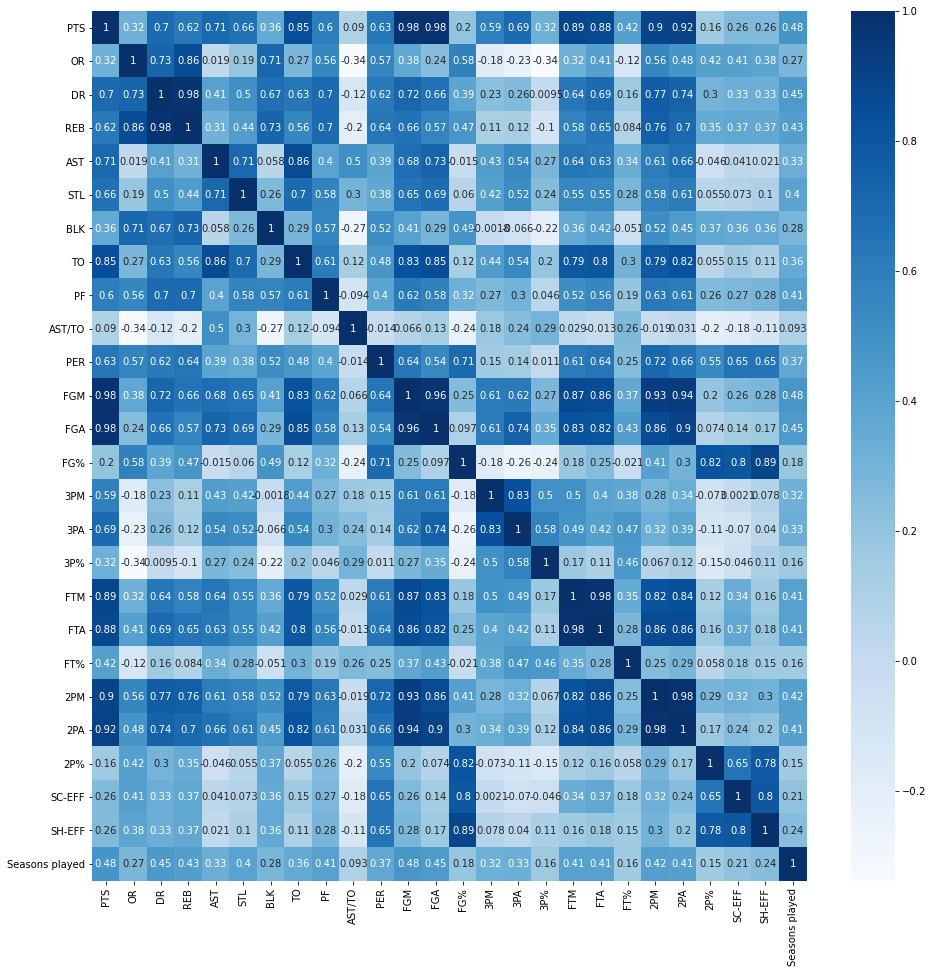

In [311]:
corr = df_final.corr()
plt.figure(figsize=(16, 16))
sb.heatmap(corr, cmap="Blues", annot=True)


In [273]:
df_Rookie=pd.DataFrame(columns=df_final.columns)
df_Defensive=pd.DataFrame(columns=df_final.columns)
df_MVP=pd.DataFrame(columns=df_final.columns)

In [274]:
for j in df_final.index:
    if(df_final['FG%'][j]>35 and df_final['PTS'][j]>8 and df_final['REB'][j]>2 and df_final['AST'][j]>3
        and df_final['BLK'][j]>0.1 and df_final['Seasons played'][j]<3):
            df_Rookie.loc[j]=df_final.loc[j] 
    if(df_final['FG%'][j]>40 and df_final['PTS'][j]>10 and df_final['REB'][j]>7.8 and df_final['AST'][j]>1
          and df_final['BLK'][j]>0.8):
            df_Defensive.loc[j]=df_final.loc[j]
    if(df_final['FG%'][j]>42.5 and df_final['PTS'][j]>18 and df_final['REB'][j]>4 and df_final['AST'][j]>4
          and df_final['BLK'][j]>0.2):
            df_MVP.loc[j]=df_final.loc[j]
            
    df_Rookie=df_Rookie.reset_index(drop=True)
    df_Defensive=df_Defensive.reset_index(drop=True)
    df_MVP=df_MVP.reset_index(drop=True)
    
    df_Rookie.sort_values('PTS', axis=0, ascending=False, inplace=True, na_position='last', ignore_index=True)
    df_Defensive.sort_values(['REB','BLK'], axis=0, ascending=False, inplace=True, na_position='last', ignore_index=True)
    df_MVP.sort_values('PTS', axis=0, ascending=False, inplace=True, na_position='last', ignore_index=True)

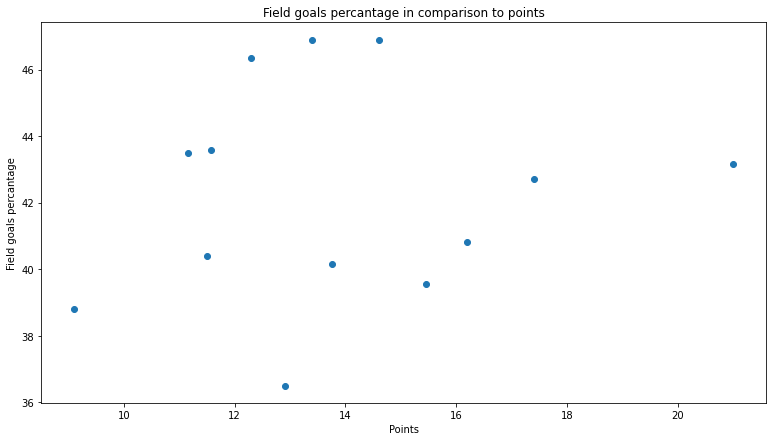

In [351]:
plt.figure(figsize=(13,7))
plt.title('Field goals percantage in comparison to points')
plt.xlabel('Points')
plt.ylabel('Field goals percantage')
plt.scatter(df_Rookie['PTS'],df_Rookie['FG%'])
plt.show()

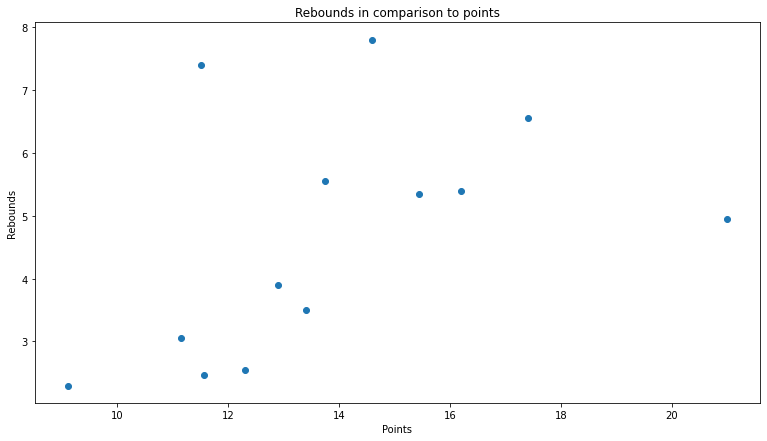

In [352]:

plt.figure(figsize=(13,7))
plt.title('Rebounds in comparison to points')
plt.xlabel('Points')
plt.ylabel('Rebounds')
plt.scatter(df_Rookie['PTS'],df_Rookie['REB'])
plt.show()

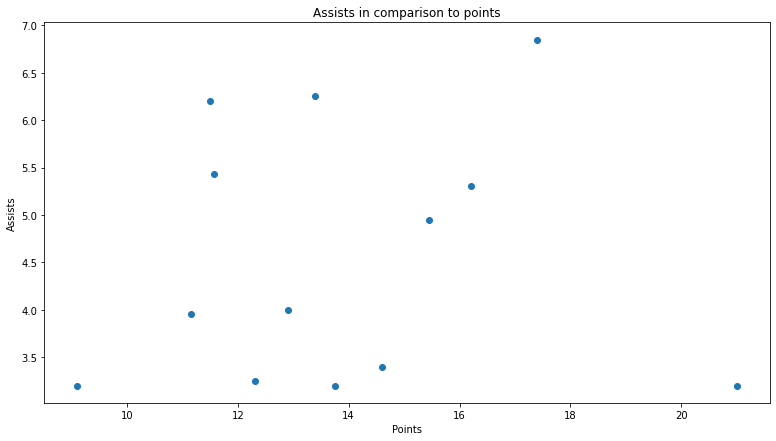

In [353]:

plt.figure(figsize=(13,7))
plt.title('Assists in comparison to points')
plt.xlabel('Points')
plt.ylabel('Assists')
plt.scatter(df_Rookie['PTS'],df_Rookie['AST'])
plt.show()

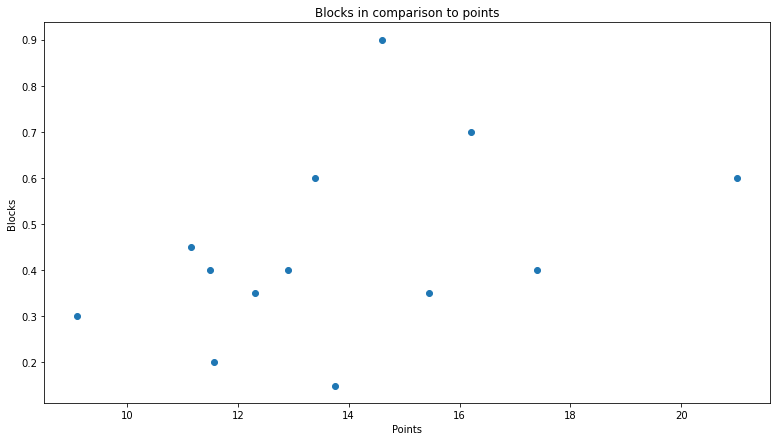

In [354]:

plt.figure(figsize=(13,7))
plt.title('Blocks in comparison to points')
plt.xlabel('Points')
plt.ylabel('Blocks')
plt.scatter(df_Rookie['PTS'],df_Rookie['BLK'])
plt.show()

In [324]:
    X=pd.DataFrame()
    list_values = []
    list_check = ['FG%','REB','AST','BLK']
    
    for i in list_check:
        X[i]=df_Rookie[i]
        y=round(df_Rookie['PTS'],0)
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=25)
        lrm=linear_model.LogisticRegression()
        lrm.fit(X_train,y_train)
        lrm.score(X_test,y_test)
        y_pred = lrm.predict(X)
        X=X.drop(i,axis=1)
        for j in range(0,100):
            if (lrm.predict([[j]])[0]>13):
                list_values.append(j)
                break
    for k in range(len(list_values)):
        print("To be the rookie of the year, the player need at least: ",list_values[k],list_check[k])
       

To be the rookie of the year, the player need at least:  46 FG%
To be the rookie of the year, the player need at least:  7 REB
To be the rookie of the year, the player need at least:  0 AST
To be the rookie of the year, the player need at least:  3 BLK


In [332]:
    df_test=df_Rookie.drop(['Name'],axis=1)
    x=df_test.iloc[0:6].drop('PTS',axis=1)
    y=df_test['PTS'].iloc[0:6].astype('int')
   
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    lrm=linear_model.LogisticRegression()
    lrm.fit(X_train,y_train)
    y_pred = lrm.predict(x)
    y_actual=y
       
    print(lrm.score(X_test,y_test))
    metrics.confusion_matrix(y_actual, y_pred)
    print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
    print("precision is:",metrics.precision_score(y_actual, y_pred,average='macro'))
    print("recall is:",metrics.recall_score(y_actual, y_pred,average='macro'))
    print("f1 is:",metrics.f1_score(y_actual, y_pred,average='macro'))
    df1=df_Rookie[round(df_Rookie['PTS'],0)==y_pred[0]]
    print("The Rookie of the year is: ", df1['Name'].values[0])

0.0
accuracy is: 0.6666666666666666
precision is: 0.5
recall is: 0.6666666666666666
f1 is: 0.5555555555555555
The Rookie of the year is:  Cade Cunningham


In [313]:
clf=SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(clf.predict(x))
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred,average='macro',zero_division=0))
print("recall is:",metrics.recall_score(y_actual, y_pred,average='macro'))
print("f1 is:",metrics.f1_score(y_actual, y_pred,average='macro'))
name =df_Rookie[round(df_Rookie['PTS'],0)==y_pred[0]]
print("The Rookie of the year is: ", name['Name'].values[0])

0.0
[16 16 16 15 14 13]
accuracy is: 0.6666666666666666
precision is: 0.5
recall is: 0.6666666666666666
f1 is: 0.5555555555555555
The Rookie of the year is:  Cade Cunningham


(array([1., 1., 3., 3., 1., 2., 1., 0., 0., 1.]),
 array([ 9.1 , 10.29, 11.48, 12.67, 13.86, 15.05, 16.24, 17.43, 18.62,
        19.81, 21.  ]),
 <BarContainer object of 10 artists>)

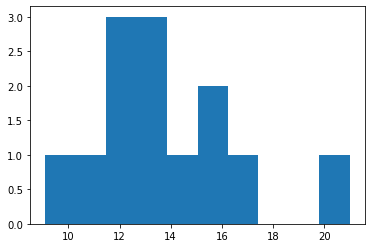

In [282]:
hist = plt.hist(df_Rookie['PTS'].tolist())
hist

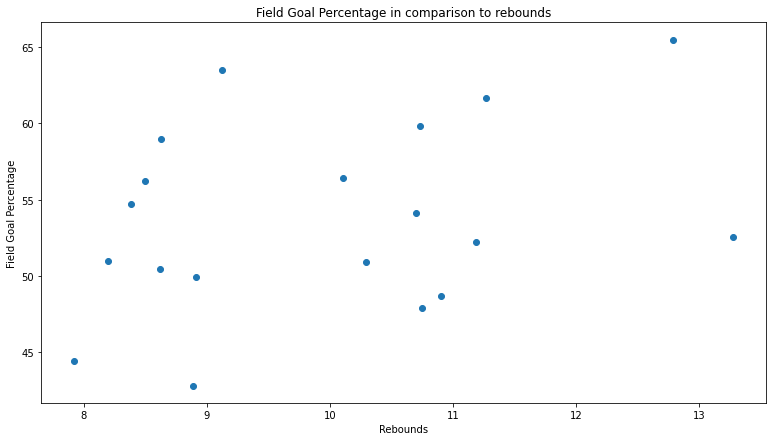

In [348]:
plt.figure(figsize=(13,7))
plt.title('Field Goal Percentage in comparison to rebounds')
plt.xlabel('Rebounds')
plt.ylabel('Field Goal Percentage')
plt.scatter(df_Defensive['REB'],df_Defensive['FG%'])
plt.show()

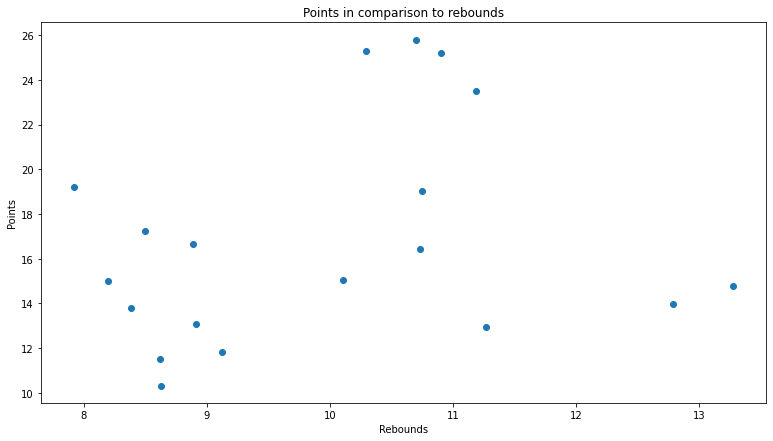

In [349]:
plt.figure(figsize=(13,7))
plt.title('Points in comparison to rebounds')
plt.xlabel('Rebounds')
plt.ylabel('Points')
plt.scatter(df_Defensive['REB'],df_Defensive['PTS'])
plt.show()

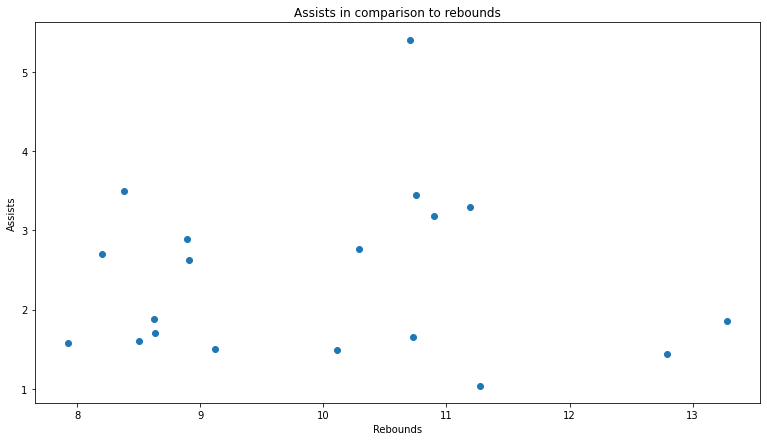

In [350]:
plt.figure(figsize=(13,7))
plt.title('Assists in comparison to rebounds')
plt.xlabel('Rebounds')
plt.ylabel('Assists')
plt.scatter(df_Defensive['REB'],df_Defensive['AST'])
plt.show()

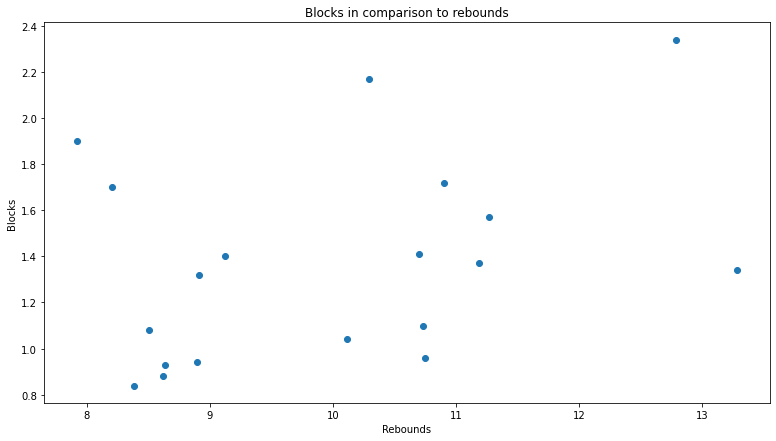

In [346]:
plt.figure(figsize=(13,7))
plt.title('Blocks in comparison to rebounds')
plt.xlabel('Rebounds')
plt.ylabel('Blocks')
plt.scatter(df_Defensive['REB'],df_Defensive['BLK'])
plt.show()

In [287]:
    X=pd.DataFrame()
    list_values = []
    list_check = ['FG%','PTS','AST','BLK']
    
    for i in list_check:
        X[i]=df_Defensive[i]
        y=round(df_Defensive['REB'],0)
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
        lrm=linear_model.LogisticRegression()
        lrm.fit(X_train,y_train)
        lrm.score(X_test,y_test)
        y_pred = lrm.predict(X)
        X=X.drop(i,axis=1)
        for j in range(0,100):
            if (lrm.predict([[j]])[0]>10):
                list_values.append(j)
                break
    for k in range(len(list_values)):
        print("To be the Defensive player of the year, the player need at least: ",list_values[k],list_check[k])

To be the Defensive player of the year, the player need at least:  50 FG%
To be the Defensive player of the year, the player need at least:  17 PTS
To be the Defensive player of the year, the player need at least:  3 AST
To be the Defensive player of the year, the player need at least:  2 BLK


In [304]:
df_test=df_Defensive.drop(['Name'],axis=1)
x=df_test.iloc[0:6]
y=df_test['REB'].iloc[0:6].astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=35)
lrm=linear_model.LogisticRegression()
lrm.fit(X_train,y_train)
y_pred = lrm.predict(x)
y_actual=y

print(lrm.score(X_test,y_test))
metrics.confusion_matrix(y_actual, y_pred)
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred,average='macro'))
print("recall is:",metrics.recall_score(y_actual, y_pred,average='macro'))
print("f1 is:",metrics.f1_score(y_actual, y_pred,average='macro'))
df1=df_Defensive[round(df_Defensive['REB'],0)==y_pred[0]]
print("The Defensive player of the year is: ", df1['Name'].values[0])

0.0
accuracy is: 0.6666666666666666
precision is: 0.5416666666666666
recall is: 0.625
f1 is: 0.5333333333333333
The Defensive player of the year is:  Anthony Davis


In [305]:
clf=SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(clf.predict(x))
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred,average='macro',zero_division=0))
print("recall is:",metrics.recall_score(y_actual, y_pred,average='macro'))
print("f1 is:",metrics.f1_score(y_actual, y_pred,average='macro'))
name =df_Defensive[round(df_Defensive['REB'],0)==y_pred[0]]
print("The Defensive player of the year is: ", name['Name'].values[0])

0.0
[10 10 10 10 10 10]
accuracy is: 0.6666666666666666
precision is: 0.5416666666666666
recall is: 0.625
f1 is: 0.5333333333333333
The Defensive player of the year is:  Anthony Davis


(array([3., 5., 1., 0., 2., 4., 2., 0., 0., 2.]),
 array([ 7.92 ,  8.456,  8.992,  9.528, 10.064, 10.6  , 11.136, 11.672,
        12.208, 12.744, 13.28 ]),
 <BarContainer object of 10 artists>)

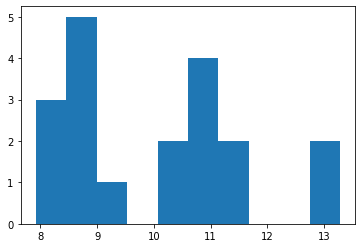

In [230]:
hist = plt.hist(df_Defensive['REB'].tolist())
hist

(array([5., 3., 0., 5., 1., 2., 0., 1., 1., 1.]),
 array([0.84, 0.99, 1.14, 1.29, 1.44, 1.59, 1.74, 1.89, 2.04, 2.19, 2.34]),
 <BarContainer object of 10 artists>)

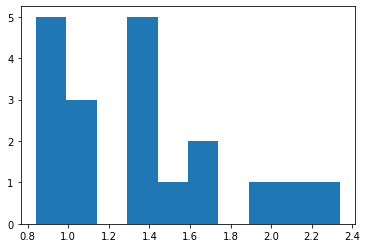

In [333]:
hist = plt.hist(df_Defensive['BLK'].tolist())
hist

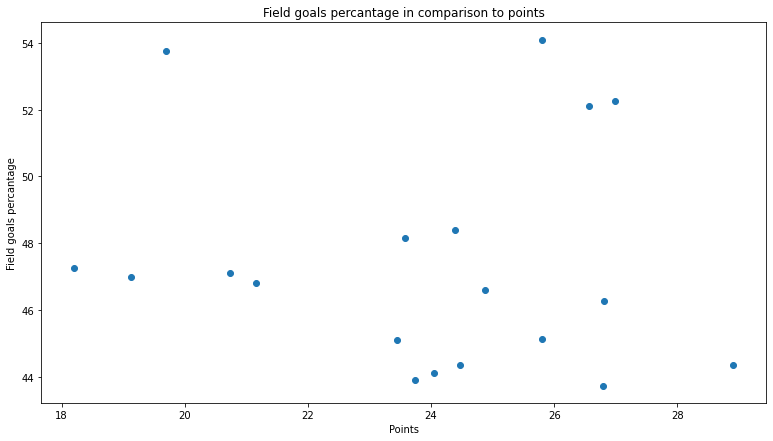

In [355]:

plt.figure(figsize=(13,7))
plt.title('Field goals percantage in comparison to points')
plt.xlabel('Points')
plt.ylabel('Field goals percantage')
plt.scatter(df_MVP['PTS'],df_MVP['FG%'])
plt.show()

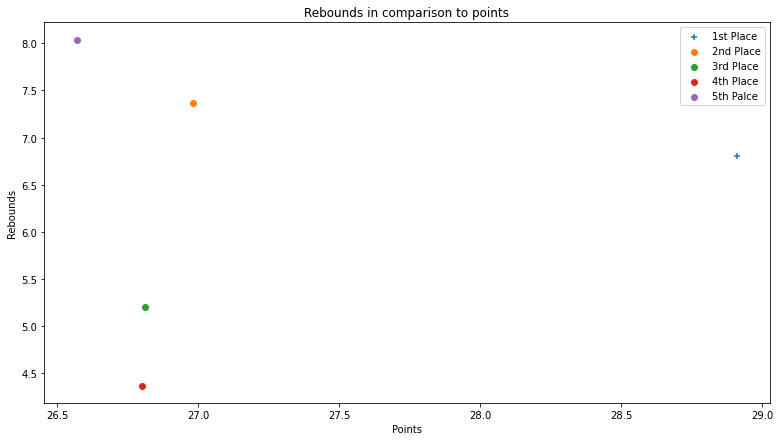

In [343]:

plt.figure(figsize=(13,7))
plt.title('Rebounds in comparison to points')
plt.xlabel('Points')
plt.ylabel('Rebounds')
plt.scatter(df_MVP['PTS'],df_MVP['REB'])
plt.show()

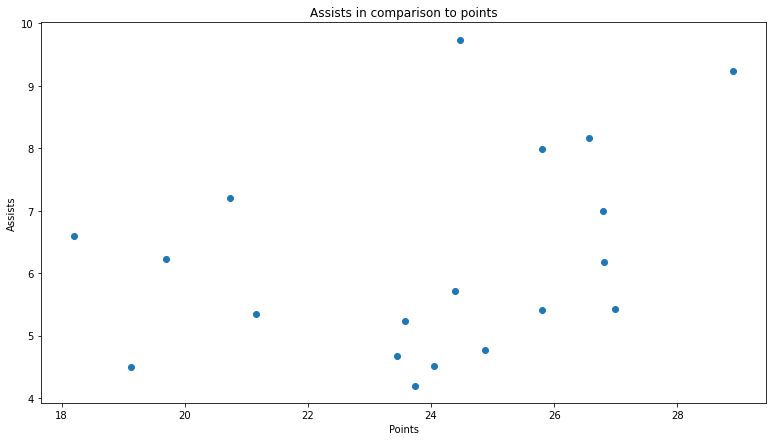

In [356]:
plt.figure(figsize=(13,7))
plt.title('Assists in comparison to points')
plt.xlabel('Points')
plt.ylabel('Assists')
plt.scatter(df_MVP['PTS'],df_MVP['AST'])
plt.show()

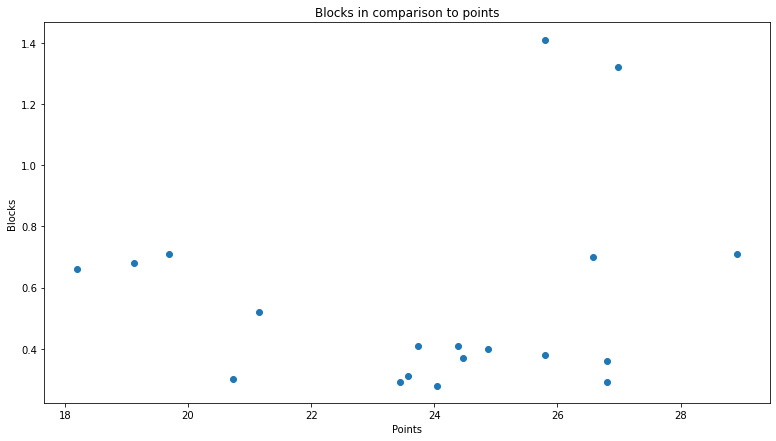

In [357]:

plt.figure(figsize=(13,7))
plt.title('Blocks in comparison to points')
plt.xlabel('Points')
plt.ylabel('Blocks')
plt.scatter(df_MVP['PTS'],df_MVP['BLK'])
plt.show()

In [220]:
    X=pd.DataFrame()
    list_values = []
    list_check = ['FG%','REB','AST','BLK']
    
    for i in list_check:
        X[i]=df_MVP[i]
        y=round(df_MVP['PTS'],0)
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=25)
        lrm=linear_model.LogisticRegression()
        lrm.fit(X_train,y_train)
        lrm.score(X_test,y_test)
        y_pred = lrm.predict(X)
        X=X.drop(i,axis=1)
        for j in range(0,100):
            if (lrm.predict([[j]])[0]>23):
                list_values.append(j)
                break
    for k in range(len(list_values)):
        print("To be the MVP of the year, the player needs at least: ",list_values[k],list_check[k])
       

To be the MVP of the year, the player needs at least:  39 FG%
To be the MVP of the year, the player needs at least:  4 REB
To be the MVP of the year, the player needs at least:  4 AST
To be the MVP of the year, the player needs at least:  0 BLK


In [221]:
    df_test=df_MVP.drop(['Name'],axis=1)
    x=df_test.iloc[0:6]
    y=df_test['PTS'].iloc[0:6].astype('int')
   
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    lrm=linear_model.LogisticRegression()
    lrm.fit(X_train,y_train)
    y_pred = lrm.predict(x)
    y_actual=y
       
    print(lrm.score(X_test,y_test))
    metrics.confusion_matrix(y_actual, y_pred)
    print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
    print("precision is:",metrics.precision_score(y_actual, y_pred,average='macro'))
    print("recall is:",metrics.recall_score(y_actual, y_pred,average='macro'))
    print("f1 is:",metrics.f1_score(y_actual, y_pred,average='macro'))
    df1=df_MVP[round(df_MVP['PTS'],0)==y_pred[0]]
    print("The MVP of the year is: ", df1[df1['REB']==max(df1['REB'])]['Name'].values[0])

0.5
accuracy is: 0.8333333333333334
precision is: 0.6
recall is: 0.6666666666666666
f1 is: 0.6296296296296297
The MVP of the year is:  Giannis Antetokounmpo


In [228]:
clf=SVC()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=35)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(clf.predict(x))
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred,average='macro',zero_division=0))
print("recall is:",metrics.recall_score(y_actual, y_pred,average='macro'))
print("f1 is:",metrics.f1_score(y_actual, y_pred,average='macro'))
df1=df_MVP[round(df_MVP['PTS'],0)==y_pred[0]]
print("The MVP of the year is: ", df1[df1['REB']==max(df1['REB'])]['Name'].values[0])

0.5
[26 26 26 26 26 26]
accuracy is: 0.8333333333333334
precision is: 0.6
recall is: 0.6666666666666666
f1 is: 0.6296296296296297
The MVP of the year is:  Giannis Antetokounmpo


(array([2., 1., 2., 0., 1., 5., 1., 3., 3., 1.]),
 array([18.2  , 19.271, 20.342, 21.413, 22.484, 23.555, 24.626, 25.697,
        26.768, 27.839, 28.91 ]),
 <BarContainer object of 10 artists>)

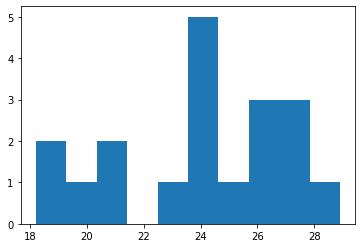

In [229]:

hist = plt.hist(df_MVP['PTS'].tolist())
hist